# Project introduction

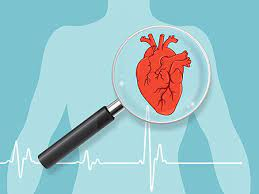

### This heart disease dataset is acquired from one of the multispecialty hospitals in India

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [ ]:
df=pd.read_csv('/content/Cardiovascular_Disease_Dataset.csv')

In [ ]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [ ]:
df.shape

(1000, 14)

In [ ]:
df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [ ]:
df = df[df['serumcholestrol'] >= 126]

In [ ]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
6,168686,79,1,2,130,240,0,2,157,0,2.5,2,1,1
7,170498,52,1,0,127,345,0,0,192,1,4.9,1,0,0


## What is count of patient !?

In [ ]:
df['patientid'].count()

940

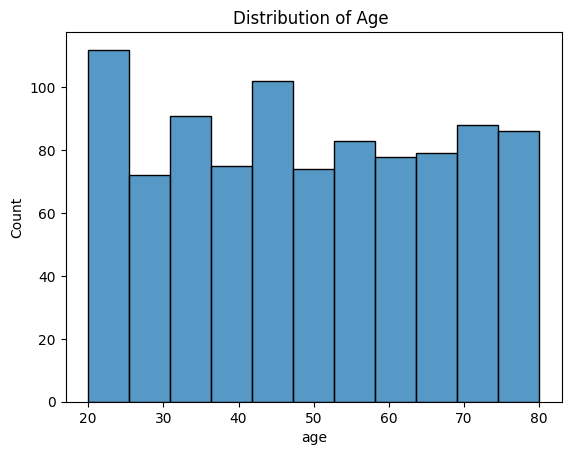

In [ ]:
sns.histplot(df['age'])
plt.title('Distribution of Age ')
plt.show()

## Distribution of Gender

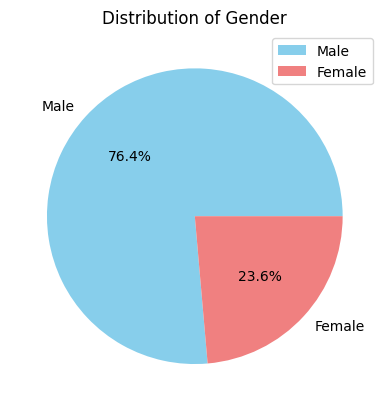

In [ ]:
g = df['gender'].value_counts()
gender_labels = {1: 'Male', 0: 'Female'}
g.index = g.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']
plt.pie(g, labels=g.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Distribution of Gender')
plt.show()

### Chestpain
0 - typical angina<br>
1 - atypical angina<br>
2 - non-anginal pain<br>
3 - asymptomatic<br>

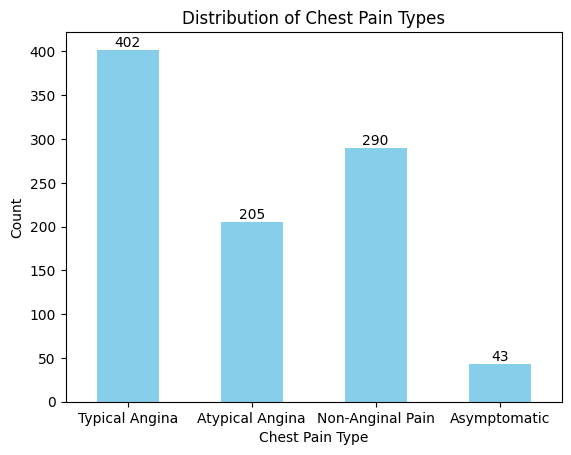

In [ ]:
chestpain_labels = {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'}
bf = df['chestpain'].value_counts().sort_index().plot(kind='bar', color='skyblue')

for p in bf.patches:
    bf.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

bf.set_xticklabels([chestpain_labels[i] for i in bf.get_xticks()], rotation=0)

plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

## restingBP --> 94-200 (in mm HG)

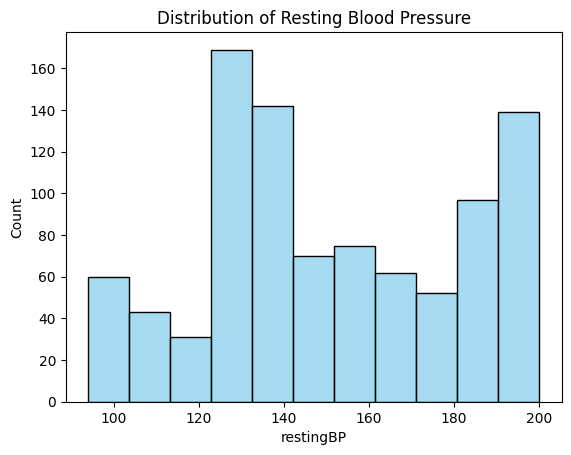

In [ ]:
sns.histplot(df['restingBP'], color='skyblue')
plt.title('Distribution of Resting Blood Pressure')
plt.show()

## serumcholestrol --> 126-564 (in mg/dl)

In [ ]:
df['serumcholestrol'].min(),df['serumcholestrol'].mean()

(132, 330.68510638297874)

##### Filter of values minimum 126

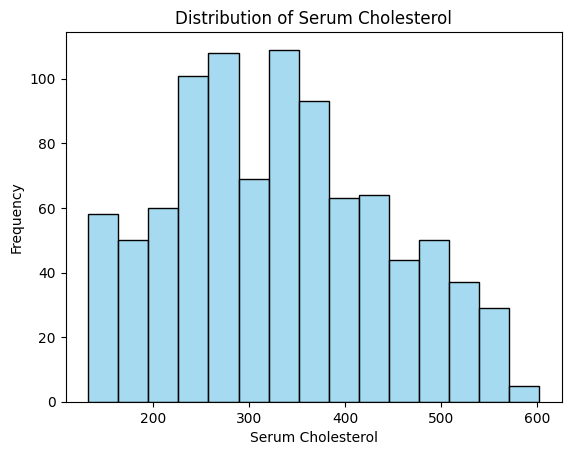

In [ ]:
sns.histplot(df['serumcholestrol'], color='skyblue')
plt.title('Distribution of Serum Cholesterol')
plt.xlabel('Serum Cholesterol')
plt.ylabel('Frequency')
plt.show()

## fastingbloodsugar --> 0 (false) / 1 (true) > 120 mg/dl

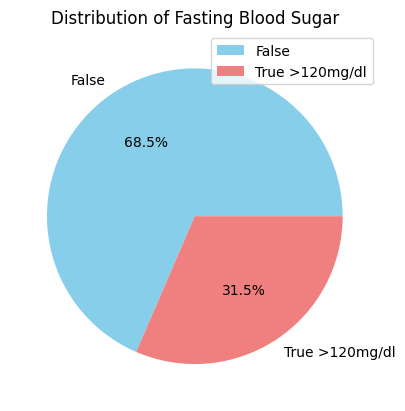

In [ ]:
g = df['fastingbloodsugar'].value_counts()
gender_labels = {1: 'True >120mg/dl', 0: 'False'}
g.index = g.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']
plt.pie(g, labels=g.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Distribution of Fasting Blood Sugar')
plt.show()

## restingrelectro
-0 Normal<br> -1 ST-T wave abnormality<br> -2 Probable or definite left ventricular hypertrophy

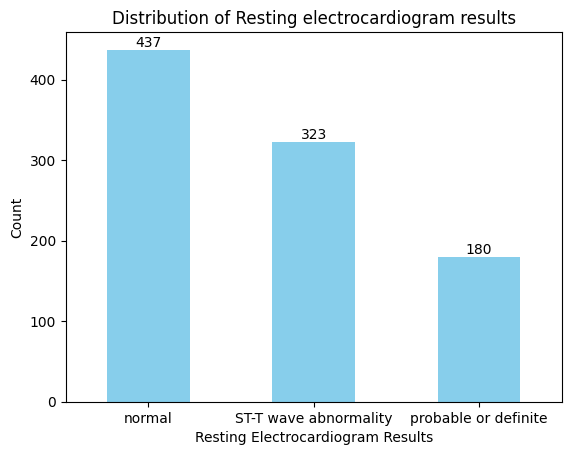

In [ ]:
chestpain_labels = {0: 'normal', 1: 'ST-T wave abnormality', 2: 'probable or definite'}
re= df['restingrelectro'].value_counts().sort_index().plot(kind='bar', color='skyblue')

for p in re.patches:
    re.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

re.set_xticklabels([chestpain_labels[i] for i in re.get_xticks()], rotation=0)

plt.title('Distribution of Resting electrocardiogram results')
plt.xlabel('Resting Electrocardiogram Results')
plt.ylabel('Count')
plt.show()

## maxheartrate

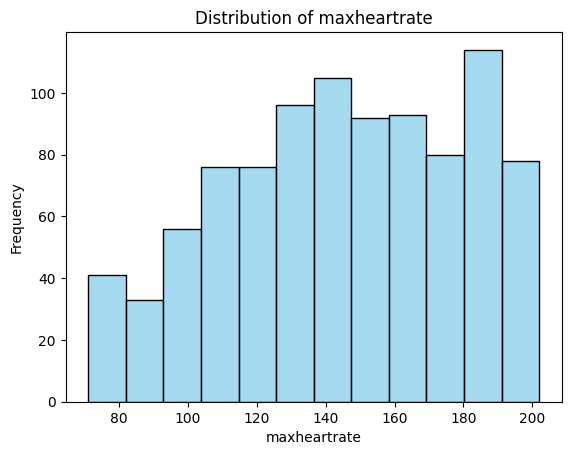

In [ ]:
sns.histplot(df['maxheartrate'], color='skyblue')
plt.title('Distribution of maxheartrate')
plt.xlabel('maxheartrate')
plt.ylabel('Frequency')
plt.show()

### exerciseangia --> Exercise induced angina

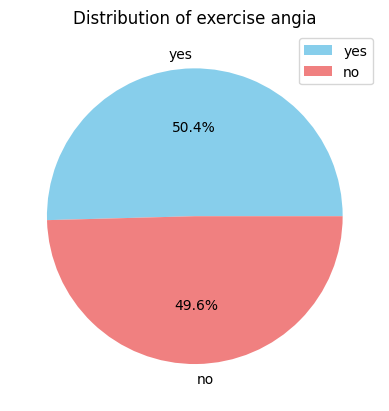

In [ ]:
e = df['exerciseangia'].value_counts()
gender_labels = {1: 'yes', 0: 'no'}
e.index = e.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']
plt.pie(e, labels=e.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Distribution of exercise angia')
plt.show()

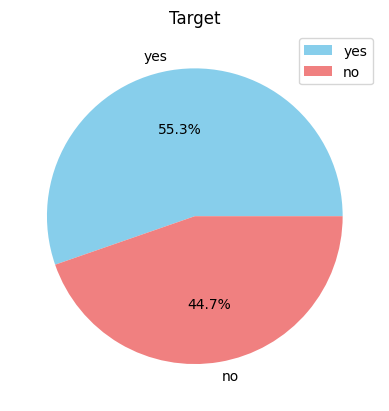

In [ ]:
t = df['target'].value_counts()
gender_labels = {1: 'Presence', 0: 'Absence'}
t.index = t.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']
plt.pie(t, labels=e.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Target')
plt.show()

In [ ]:
df.head(3)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1


In [ ]:
df.drop(columns='patientid',inplace=True)

# Insights

## Data included patient have a heart disease and male gender

In [ ]:
patient_Presence=df[df['target']==1]

In [ ]:
patient_Presence_male=patient_Presence[patient_Presence['gender']==1]

In [ ]:
patient_Presence_male.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000,400.000000,400.000000,400.000000,400.0
mean,49.495000,1.0,1.512500,163.902500,366.012500,0.472500,1.017500,154.81250,0.475,3.098500,2.215000,1.730000,1.0
std,17.206106,0.0,0.810238,24.030223,113.727976,0.499868,0.792947,25.84419,0.500,1.783943,0.659441,0.786541,0.0
min,20.000000,1.0,0.000000,94.000000,170.000000,0.000000,0.000000,105.00000,0.000,0.000000,1.000000,0.000000,1.0
25%,35.000000,1.0,1.000000,147.000000,271.750000,0.000000,0.000000,137.00000,0.000,1.575000,2.000000,1.000000,1.0
50%,49.000000,1.0,2.000000,166.000000,367.000000,0.000000,1.000000,154.50000,0.000,3.100000,2.000000,2.000000,1.0
75%,63.250000,1.0,2.000000,184.000000,464.000000,1.000000,2.000000,176.00000,1.000,4.600000,3.000000,2.000000,1.0
max,80.000000,1.0,3.000000,200.000000,602.000000,1.000000,2.000000,202.00000,1.000,6.200000,3.000000,3.000000,1.0


## Data included patient have a heart disease and female  gender

In [ ]:
patient_Presence_female =patient_Presence[patient_Presence['gender']==0]
patient_Presence_female.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,120.000000,120.0,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0
mean,49.750000,0.0,1.316667,165.366667,386.616667,0.425000,1.033333,142.175000,0.541667,2.032500,2.241667,1.333333,1.0
std,17.467016,0.0,1.004053,32.480099,108.372311,0.496416,0.829431,34.028081,0.500350,0.884808,0.594030,1.023533,0.0
min,20.000000,0.0,0.000000,94.000000,177.000000,0.000000,0.000000,96.000000,0.000000,0.000000,1.000000,0.000000,1.0
25%,36.750000,0.0,0.000000,133.000000,297.750000,0.000000,0.000000,109.500000,0.000000,1.400000,2.000000,0.000000,1.0
50%,49.000000,0.0,1.000000,184.000000,385.500000,0.000000,1.000000,140.500000,1.000000,1.900000,2.000000,1.000000,1.0
75%,64.250000,0.0,2.000000,191.000000,488.250000,1.000000,2.000000,175.000000,1.000000,2.750000,3.000000,2.000000,1.0
max,80.000000,0.0,3.000000,200.000000,561.000000,1.000000,2.000000,198.000000,1.000000,3.200000,3.000000,3.000000,1.0


## Data included patient not have a heart disease and male gender

In [ ]:
patient_Absence=df[df['target']==0]

In [ ]:
patient_Absence_male=patient_Absence[patient_Absence['gender']==1]

In [ ]:
patient_Absence_male.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,318.000000,318.0,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.0
mean,48.776730,1.0,0.342767,131.842767,265.905660,0.132075,0.314465,135.584906,0.522013,2.909119,0.528302,0.569182,0.0
std,18.822862,0.0,0.663701,26.501481,73.779345,0.339106,0.484958,39.975750,0.500302,1.737927,0.548141,0.782252,0.0
min,20.000000,1.0,0.000000,94.000000,132.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,32.000000,1.0,0.000000,113.250000,231.250000,0.000000,0.000000,101.000000,0.000000,1.325000,0.000000,0.000000,0.0
50%,48.500000,1.0,0.000000,127.000000,268.000000,0.000000,0.000000,132.000000,1.000000,2.900000,1.000000,0.000000,0.0
75%,66.000000,1.0,0.000000,140.000000,336.000000,0.000000,1.000000,172.000000,1.000000,4.300000,1.000000,1.000000,0.0
max,80.000000,1.0,3.000000,200.000000,357.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,0.0


### Data included patient not have a heart disease and female gender

In [ ]:
patient_Absence_female =patient_Absence[patient_Absence['gender']==0]
patient_Absence_female.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,102.000000,102.0,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,49.970588,0.0,0.411765,143.892157,328.303922,0.137255,0.509804,138.558824,0.519608,1.263725,0.823529,0.941176,0.0
std,18.393098,0.0,0.722385,24.724585,108.369718,0.345816,0.592780,37.034791,0.502083,0.833552,0.475369,0.899103,0.0
min,20.000000,0.0,0.000000,94.000000,164.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,33.500000,0.0,0.000000,130.000000,221.250000,0.000000,0.000000,111.500000,0.000000,0.400000,1.000000,0.000000,0.0
50%,50.500000,0.0,0.000000,138.500000,361.000000,0.000000,0.000000,135.500000,1.000000,1.400000,1.000000,1.000000,0.0
75%,67.000000,0.0,1.000000,153.750000,431.000000,0.000000,1.000000,169.500000,1.000000,1.900000,1.000000,2.000000,0.0
max,80.000000,0.0,3.000000,200.000000,465.000000,1.000000,2.000000,202.000000,1.000000,2.600000,2.000000,3.000000,0.0


In [ ]:
age_tregt=df.query('age >60 and target == 1')

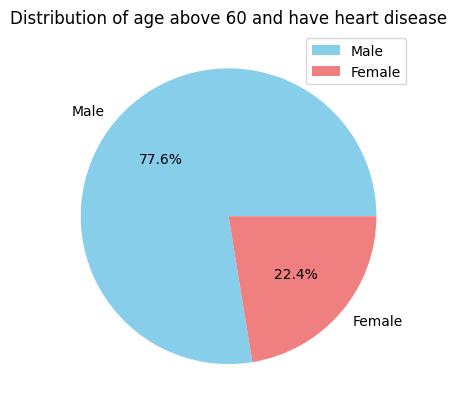

In [ ]:
g = age_tregt['gender'].value_counts()
gender_labels = {1: 'Male', 0: 'Female'}
g.index = g.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']
plt.pie(g, labels=g.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Distribution of age above 60 and have heart disease')
plt.show()

In [ ]:
df.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
6,79,1,2,130,240,0,2,157,0,2.5,2,1,1
7,52,1,0,127,345,0,0,192,1,4.9,1,0,0


## Feature Engineering

In [ ]:
X=df.drop(columns='target')
y=df['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier()]

In [ ]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, shuffle=True)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [ ]:
for model in models:
    train(model)

Model: LogisticRegression()
CV score: 0.9372340425531915
Model: DecisionTreeClassifier()
CV score: 0.9670212765957447
Model: RandomForestClassifier()
CV score: 0.973404255319149


In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

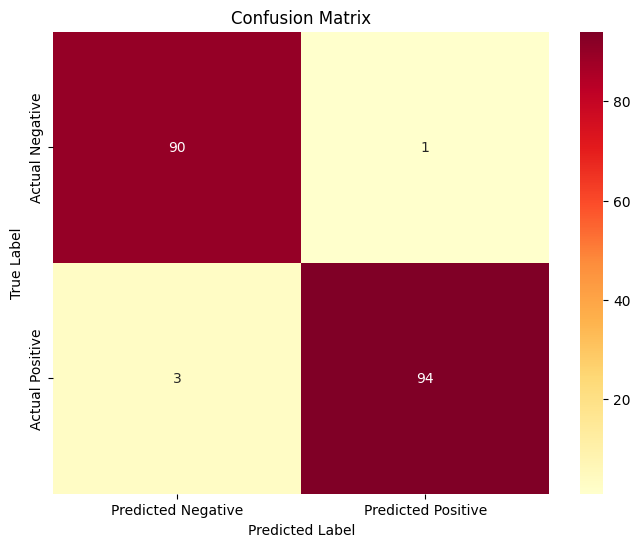

In [ ]:
cm=confusion_matrix(y_pred, y_test)
plt.figure(figsize =(8,6))
sns.heatmap(cm,annot=True,fmt ='d',cmap="YlOrRd",
            xticklabels=['Predicted Negative','Predicted Positive'],
            yticklabels=['Actual Negative','Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# print(f'confusion_matrix :{cm}')

In [ ]:
accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [ ]:
value1 = float(input("Enter age: "))
value2 = float(input("Enter your gender(1 for male and 0 for females): "))
value3 = float(input("Enter the resting blood pressure : "))
value4= float(input("Enter value of serumcholestrol (greater than 126): "))
value5 = float(input("Enter value of fastingbloodsugar ( Enter 1 for yes and 0 for No): "))
value6 = float(input("Enter value of restingelectro (0/1/2) "))
value7 = float(input("Enter maxheartrate: "))
value8 = float(input("Enter value of exercise angia (0 for No and 1 for yes)"))
value9 = float(input("Enter value of oldpeak (0-6)"))
value10 = float(input("Enter value of slope (0-3)"))
value11 = float(input("Enter value of no of majorvessels (0-3)"))
value12 = float(input("Enter value of chestpain"))
#value13=float(input("Enter patientid"))


# Create a numpy array with the user input
X_new = np.array([[value1, value2,value3,value4,value5,value6,value7,value8,value9,value10,value11,value12]])  # Add more values if there are more features

# Make predictions
predictions = model.predict(X_new)

# Print or use the predictions as needed
if(predictions==0):
 print("Patient has no risk!")
else:
  print("patient has risk of cardiovascular diseases")



Enter age: 40
Enter your gender(1 for male and 0 for females): 0
Enter the resting blood pressure : 120
Enter value of serumcholestrol (greater than 126): 128
Enter value of fastingbloodsugar ( Enter 1 for yes and 0 for No): 1
Enter value of restingelectro (0/1/2) 1
Enter maxheartrate: 80
Enter value of exercise angia (0 for No and 1 for yes)1
Enter value of oldpeak (0-6)2
Enter value of slope (0-3)3
Enter value of no of majorvessels (0-3)3
Enter value of chestpain1
patient has risk of cardiovascular diseases
